In [18]:

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import numpy as np



# Load Data

In [5]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


# Preprocess Data

In [19]:

X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']
X_test = test_data.copy()

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


# Visualize Data

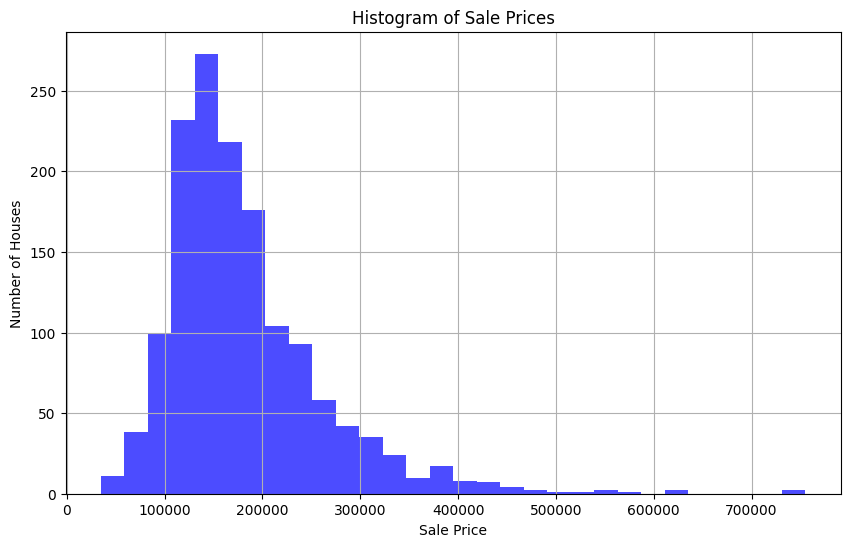

In [12]:
import matplotlib.pyplot as plt

# Create a histogram of the sale prices
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.show()


# K-Nearest Neighbors Model Training and Evaluation

In [38]:
X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(
    X_train_preprocessed, y_train, test_size=0.2, random_state=42)


def train_evaluate_knn(n_neighbors, X_train, y_train, X_test, y_test):
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    predictions = knn_model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, predictions)
    
    print(f'KNN with {n_neighbors} neighbors:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAPE: {mape}')
    
    return knn_model, mae, mse, rmse, mape

knn_model, mae, mse, rmse, mape = train_evaluate_knn(5, X_train_part, y_train_part, X_test_part, y_test_part)

# Print the results
#print(f'MAE with 3 neighbors: {mae}, MSE with 3 neighbors: {mse}, RMSE with 3 neighbors: {rmse}, MAPE with 3 neighbors: {mape}')


KNN with 5 neighbors:
MAE: 29298.278767123287
MSE: 2359467665.818219
RMSE: 48574.35193410427
MAPE: 17.57395502977542


# Decision Tree Model Training and Evaluation

In [29]:

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_preprocessed, y_train)
tree_predictions = tree_model.predict(X_test_part)
tree_mae = mean_absolute_error(y_test_part, tree_predictions)
tree_mse = mean_squared_error(y_test_part, tree_predictions)
print(f'Decision Tree MAE: {tree_mae}, Decision Tree MSE: {tree_mse}')


Decision Tree MAE: 0.0, Decision Tree MSE: 0.0


In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

tree_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)

tree_model.fit(X_train_part, y_train_part)

tree_predictions = tree_model.predict(X_test_part)

tree_mae = mean_absolute_error(y_test_part, tree_predictions)
tree_mse = mean_squared_error(y_test_part, tree_predictions)
tree_mape= mean_absolute_percentage_error(y_test_part,tree_predictions)

print(f'Decision Tree MAE: {tree_mae}')
print( f'Decision Tree MSE: {tree_mse}')
# Additional evaluation metrics
rmse = sqrt(mean_squared_error(y_test_part, tree_predictions))
r2 = r2_score(y_test_part, tree_predictions)

# Printing the additional metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')
print( f'Decision Tree MAPE: {tree_mape}')



Decision Tree MAE: 24492.321727522944, Decision Tree MSE: 1562827040.8643765
Root Mean Squared Error (RMSE): 39532.60731174174
R² Score: 0.7962502508172337


In [ ]:

# Additional evaluation metrics
rmse = sqrt(mean_squared_error(y_test_part, tree_predictions))
r2 = r2_score(y_test_part, tree_predictions)

# Printing the additional metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')


Root Mean Squared Error (RMSE): 39532.60731174174
R² Score: 0.7962502508172337


In [ ]:
''' USED FOR MAKING A CHART!
from sklearn.tree import export_graphviz
import graphviz

# Assuming the tree_model has already been trained
dot_data = export_graphviz(tree_model, out_file=None, 
                           feature_names=pd.get_dummies(X_train[categorical_cols.tolist() + numerical_cols.tolist()]).columns,  
                           class_names=['SalePrice'],https://cdn.discordapp.com/attachments/846462223529934919/1236045279925501983/tree.png?ex=664271df&is=6641205f&hm=874777b5d3f063196aaf4288161b4821d66f40f84fbe8934cd236cd02437c9d7&
                           filled=True, rounded=True,  
                           special_characters=True)

# Generate the graph
graph = graphviz.Source(dot_data)
try:
    graph.view() 
finally:
    print("graph made!")'''

' USED FOR MAKING A CHART!\nfrom sklearn.tree import export_graphviz\nimport graphviz\n\n# Assuming the tree_model has already been trained\ndot_data = export_graphviz(tree_model, out_file=None, \n                           feature_names=pd.get_dummies(X_train[categorical_cols.tolist() + numerical_cols.tolist()]).columns,  \n                           class_names=[\'SalePrice\'],\n                           filled=True, rounded=True,  \n                           special_characters=True)\n\n# Generate the graph\ngraph = graphviz.Source(dot_data)\ntry:\n    graph.view() \nfinally:\n    print("graph made!")'

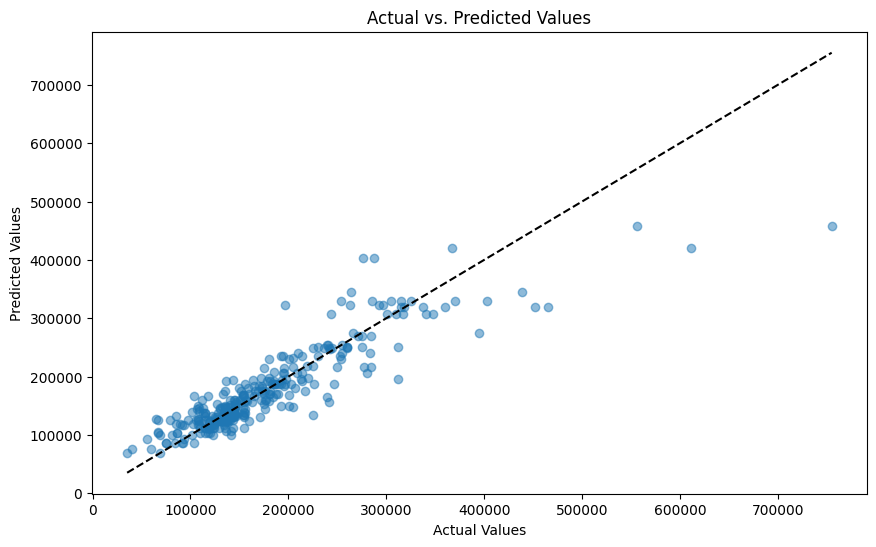

In [ ]:

import matplotlib.pyplot as plt

# Plotting the Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_part, tree_predictions, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test_part), max(y_test_part)], [min(y_test_part), max(y_test_part)], 'k--')  # A diagonal line where actual = predicted
plt.show()


In [ ]:

# Additional evaluation metrics
rmse = sqrt(mean_squared_error(y_test_part, tree_predictions))
r2 = r2_score(y_test_part, tree_predictions)

# Printing the additional metrics
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')
